<a href="https://colab.research.google.com/github/Ben-tech254/Natural-Language-Processing/blob/main/Sentiment_analysis_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Finetuning a model
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification, AutoTokenizer
from datasets import Dataset

# Data
reviews = [
    ("The espresso was rich and smooth. Great service too!", 1),
    ("It was okay, but nothing special.", 0),
    ("My latte was cold and the staff ignored me.", 0),
    ("Loved the cozy ambiance and friendly baristas!", 1),
    ("Coffee was fine, but the music was too loud.", 0),
    ("Terrible experience. I waited 20 minutes for a black coffee.", 0),
    ("The muffins were fresh and delicious. Will come again.", 1),
    ("Just average. Nothing stood out.", 0),
    ("The place was dirty and my drink tasted burnt.", 0),
    ("Super friendly staff and quick service!", 1)
]

# Prepare dataset
dataset = Dataset.from_dict({
    'text': [review[0] for review in reviews],
    'label': [review[1] for review in reviews]
})

# Model setup
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize
tokenized_data = dataset.map(
    lambda x: tokenizer(x["text"], padding="max_length", truncation=True),
    batched=True
)

# Training
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir='./results',
        num_train_epochs=3,
    ),
    train_dataset=tokenized_data,
    eval_dataset=tokenized_data
)

trainer.train()


#Importing the off-the-shelf model
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
sentences = [
"The espresso was rich and smooth. Great service too!",
"It was okay, but nothing special.",
"My latte was cold and the staff ignored me.",
"Loved the cozy ambiance and friendly baristas!",
"Coffee was fine, but the music was too loud.",
"Terrible experience. I waited 20 minutes for a black coffee.",
"The muffins were fresh and delicious. Will come again.",
"Just average. Nothing stood out.",
"The place was dirty and my drink tasted burnt.",
"Super friendly staff and quick service!"
]
results = sentiment_pipeline(sentences)
for sentence, result in zip(sentences, results):
  print(f"Sentence: {sentence} | Sentiment: {result['label']}, Score: {result['score']}")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: benronoh254 (benronoh254-university-of-eldoret) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


Sentence: The espresso was rich and smooth. Great service too! | Sentiment: POSITIVE, Score: 0.999830961227417
Sentence: It was okay, but nothing special. | Sentiment: NEGATIVE, Score: 0.9898498058319092
Sentence: My latte was cold and the staff ignored me. | Sentiment: NEGATIVE, Score: 0.9995538592338562
Sentence: Loved the cozy ambiance and friendly baristas! | Sentiment: POSITIVE, Score: 0.9998699426651001
Sentence: Coffee was fine, but the music was too loud. | Sentiment: NEGATIVE, Score: 0.9980465173721313
Sentence: Terrible experience. I waited 20 minutes for a black coffee. | Sentiment: NEGATIVE, Score: 0.9993807077407837
Sentence: The muffins were fresh and delicious. Will come again. | Sentiment: POSITIVE, Score: 0.9998772144317627
Sentence: Just average. Nothing stood out. | Sentiment: NEGATIVE, Score: 0.997368574142456
Sentence: The place was dirty and my drink tasted burnt. | Sentiment: NEGATIVE, Score: 0.9994113445281982
Sentence: Super friendly staff and quick service! | 

In [ ]:
#Finetuning a model

# Load dataset
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, pipeline

reviews = [
    ("This movie was amazing!", 1),
    ("Terrible experience, hated it.", 0),
    ("It was okay, not great.", 0),
    ("Absolutely loved it!", 1),
]

dataset = Dataset.from_dict({
    "text": [review[0] for review in reviews],
    "label": [review[1] for review in reviews]
})

# Load model and tokenizer
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_data = dataset.map(tokenize_function, batched=True)

# Fine-tune
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir="./results",
        num_train_epochs=3,
        per_device_train_batch_size=2,
    ),
    train_dataset=tokenized_data,
)

trainer.train()

# Explicitly save the model and tokenizer after training
trainer.save_model("./results")
tokenizer.save_pretrained("./results")

# Compare with original model
original_model = pipeline("sentiment-analysis", model="distilbert-base-uncased")
print("Original:", original_model("This movie was great!"))

# Now, the pipeline should be able to load the fine-tuned model from ./results
fine_tuned_model = pipeline("sentiment-analysis", model="./results")
print("Fine-tuned:", fine_tuned_model("This movie was great!"))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Step,Training Loss


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu
Device set to use cpu


Original: [{'label': 'LABEL_0', 'score': 0.5303387641906738}]
Fine-tuned: [{'label': 'LABEL_1', 'score': 0.6260868310928345}]


In [ ]:
# Prepare data
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np # Import numpy

texts = ["I love this!", "I hate it", "It was okay"]
labels = [1, 0, 0]  # 1=positive, 0=negative

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=5)

# Convert labels to a NumPy array
labels = np.array(labels)

# Build GRU model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(100, 16, input_length=5),
    tf.keras.layers.GRU(32),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(padded_sequences, labels, epochs=5)

# Test model
test_text = "I liked it"
test_seq = tokenizer.texts_to_sequences([test_text])
test_padded = pad_sequences(test_seq, maxlen=5)
print(model.predict(test_padded))  # >0.5 = positive

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.0000 - loss: 0.6892
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6667 - loss: 0.6853
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6667 - loss: 0.6815
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.6667 - loss: 0.6777
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6667 - loss: 0.6739
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
[[0.4776693]]


In [ ]:
# Install TextBlob
!pip install textblob
!python -m textblob.download_corpora

# Run sentiment analysis
from textblob import TextBlob

text = "I love this movie!"
blob = TextBlob(text)
print(blob.sentiment)  # Polarity (-1 to 1), Subjectivity (0 to 1)

# Compare with fine-tuned model
print("TextBlob:", TextBlob("This movie was bad").sentiment)
print("Fine-tuned Model:", fine_tuned_model("This movie was bad"))

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
Sentiment(polarity=0.625, subjectivity=0.6)
TextBlob: Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Fine-tuned Model: [{'label': 'LABEL_1', 'score': 0.5547599792480469}]


#**VERSION 2**

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

# Load the pre-trained VGG16 model, exclude the top layer (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model (i.e., layers are not trainable)
for layer in base_model.layers:
    layer.trainable = False

# Add new custom layers for fine-tuning
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Add dropout to reduce overfitting
x = layers.Dense(1, activation='sigmoid')(x)  # Binary classification (change to 'softmax' for multi-class)

# Combine base model and custom layers
fine_tune_model = Model(inputs=base_model.input, outputs=x)

# Compile the model with Adam optimizer and binary cross-entropy loss
fine_tune_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Setup data generators for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.15, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'path_to_train_data',  # Path to training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'path_to_validation_data',  # Path to validation data
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Fine-tune the model (train the top layers)
history_fine_tune = fine_tune_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Train for 10 epochs (adjust as needed)
)

# Load pre-trained model (VGG16) without fine-tuning
pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze all layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add custom classifier on top of frozen pre-trained model
x = layers.Flatten()(pretrained_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)  # Binary classification

# Build model
off_the_shelf_model = Model(inputs=pretrained_model.input, outputs=x)

# Compile the off-the-shelf model
off_the_shelf_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the off-the-shelf model without training
off_the_shelf_loss, off_the_shelf_accuracy = off_the_shelf_model.evaluate(validation_generator)

print(f"Off-the-Shelf Pre-Trained Model Accuracy: {off_the_shelf_accuracy * 100:.2f}%")

# Fine-tuned model evaluation
fine_tune_loss, fine_tune_accuracy = fine_tune_model.evaluate(validation_generator)

print(f"Fine-Tuned Model Accuracy: {fine_tune_accuracy * 100:.2f}%")
print(f"Off-the-Shelf Pre-Trained Model Accuracy: {off_the_shelf_accuracy * 100:.2f}%")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_train_data'

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
391/391 - 311s - 796ms/step - accuracy: 0.7959 - loss: 0.4324 - val_accuracy: 0.8510 - val_loss: 0.4006
Epoch 2/5
391/391 - 321s - 821ms/step - accuracy: 0.9001 - loss: 0.2535 - val_accuracy: 0.8576 - val_loss: 0.3773
Epoch 3/5
391/391 - 312s - 799ms/step - accuracy: 0.8987 - loss: 0.2533 - val_accuracy: 0.8432 - val_loss: 0.3881
Epoch 4/5
391/391 - 328s - 838ms/step - accuracy: 0.9369 - loss: 0.1671 - val_accuracy: 0.8326 - val_loss: 0.4334
Epoch 5/5
391/391 - 319s - 817ms/step - accuracy: 0.9477 - loss: 0.1407 - val_accuracy: 0.8284 - val_loss: 0.4476
LSTM Model Accuracy: 82.84%
Epoch 1/5
391/391 - 321s - 822ms/step - accuracy: 0.7129 - loss: 0.5489 - val_accuracy: 0.8024 - val_loss: 0.4442
Epoch 2/5
391/391 - 317s - 811ms/step - accuracy: 0.8576 - loss: 0.3385 - val_accuracy: 0.8366 - val_loss: 0.3798
Epoch 3/5
391/391 - 325s - 832ms/step - accuracy: 0.9100 - loss: 0.2338 - val_accuracy: 0.8658 - val_loss: 0.3370
Epoch 4/5

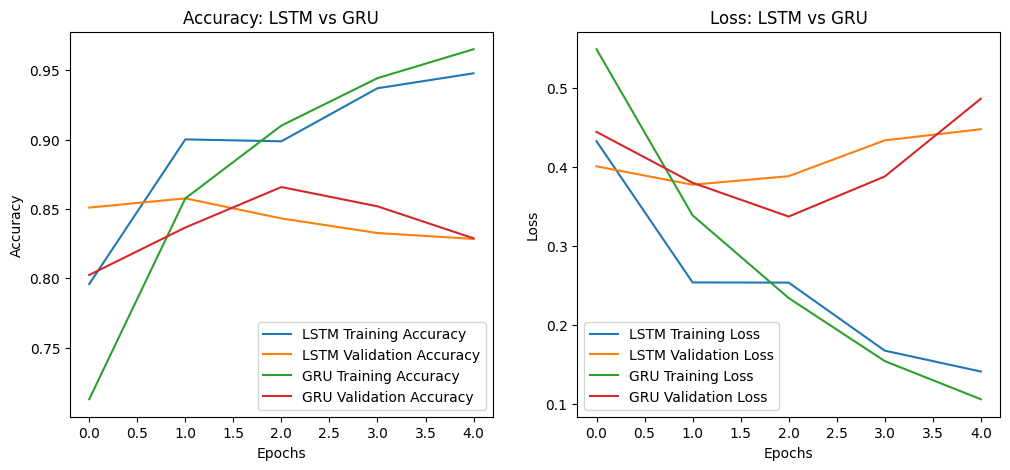

LSTM Model Accuracy: 82.84%
GRU Model Accuracy: 82.88%


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the IMDb dataset
max_words = 10000  # Consider the top 10,000 most frequent words
max_len = 200  # Pad sequences to a maximum length of 200 words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure all inputs are of the same length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

def build_lstm_model():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(layers.LSTM(128, return_sequences=False))  # LSTM layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (positive/negative)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model()

# Train the LSTM model
history_lstm = lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

def build_gru_model():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(layers.GRU(128, return_sequences=False))  # GRU layer
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = build_gru_model()

# Train the GRU model
history_gru = gru_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test, verbose=0)
print(f"GRU Model Accuracy: {gru_accuracy * 100:.2f}%")

# Plot the accuracy and loss curves for both models
def plot_learning_curves(history_lstm, history_gru):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy')
    plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy')
    plt.plot(history_gru.history['accuracy'], label='GRU Training Accuracy')
    plt.plot(history_gru.history['val_accuracy'], label='GRU Validation Accuracy')
    plt.title('Accuracy: LSTM vs GRU')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
    plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
    plt.plot(history_gru.history['loss'], label='GRU Training Loss')
    plt.plot(history_gru.history['val_loss'], label='GRU Validation Loss')
    plt.title('Loss: LSTM vs GRU')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Call the function to plot the learning curves
plot_learning_curves(history_lstm, history_gru)

# Print model comparison
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")
print(f"GRU Model Accuracy: {gru_accuracy * 100:.2f}%")

In [ ]:
from textblob import TextBlob
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Load the IMDb dataset
max_words = 10000  # Only consider the top 10,000 most frequent words
max_len = 200  # Pad sequences to a maximum length of 200 words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Convert IMDb integer sequences back to words for TextBlob
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

# Function to decode sequences back to text
def decode_review(text_sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_sequence])

# Decode some test sequences to evaluate with TextBlob
X_test_texts = [decode_review(sequence) for sequence in X_test[:1000]]  # Evaluate 1000 reviews

# Prepare input data for deep learning models (LSTM/GRU)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Use TextBlob for sentiment analysis on the test data
textblob_sentiments = []

for review in X_test_texts:
    blob = TextBlob(review)
    # TextBlob returns polarity: -1 (negative), 1 (positive), 0 (neutral)
    sentiment_score = blob.sentiment.polarity
    # Convert polarity to binary sentiment (similar to LSTM/GRU model)
    sentiment_label = 1 if sentiment_score > 0 else 0  # 1: positive, 0: negative
    textblob_sentiments.append(sentiment_label)

# TextBlob predicted labels
textblob_sentiments = np.array(textblob_sentiments)

# Evaluate TextBlob accuracy
textblob_accuracy = np.mean(textblob_sentiments == y_test[:1000])
print(f"TextBlob Sentiment Analysis Accuracy: {textblob_accuracy * 100:.2f}%")

# Define and train an LSTM model for comparison
def build_lstm_model():
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    model.add(layers.LSTM(128, return_sequences=False))
    model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification (positive/negative)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = build_lstm_model()

# Train the LSTM model (for simplicity, train on a subset)
history_lstm = lstm_model.fit(X_train, y_train, epochs=3, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate LSTM model on the same test data
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

print(f"TextBlob Sentiment Analysis Accuracy: {textblob_accuracy * 100:.2f}%")
print(f"LSTM Model Accuracy: {lstm_accuracy * 100:.2f}%")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
TextBlob Sentiment Analysis Accuracy: 66.50%
Epoch 1/3
391/391 - 303s - 774ms/step - accuracy: 0.7892 - loss: 0.4405 - val_accuracy: 0.8203 - val_loss: 0.4055
Epoch 2/3
391/391 - 328s - 839ms/step - accuracy: 0.8984 - loss: 0.2574 - val_accuracy: 0.8392 - val_loss: 0.3605
Epoch 3/3
391/391 - 299s - 765ms/step - accuracy: 0.9170 - loss: 0.2147 - val_accuracy: 0.8580 - val_loss: 0.3458
LSTM Model Accuracy: 85.80%
TextBlob Sentiment Analysis Accuracy: 66.50%
LSTM Model Accuracy: 85.80%
